# Lecture 18 2018-10-18: Numpy

Numpy arrays (4.1); functions on ndarrays (4.2); png (4.6)

This worksheet accompanies the lecture notes.

In [1]:
import numpy as np

## Introduction to ndarrays (part 2)

In [2]:
array_3d = np.arange(24).reshape((2,3,4))
array_2d = np.arange(12).reshape((3,4))

print('array_3d: \n{}\n'.format(array_3d))
print('array_2d: \n{}\n'.format(array_2d))

array_3d: 
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

array_2d: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]



### Indexing: major advantage of np.ndarrays

Indexing and slicing as in base python works, but they are enhanced for ndarrays.

Each dimension can be indexed separately, separated by commas. (see page 99, Fig 4.2). or see above for more examples.

In [11]:
print(array_3d)

array_3d[1]
#array_3d[1][0]
#array_3d[1,0]
array_3d[0:1]
array_3d[0:1,0]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[0, 1, 2, 3]])

In [7]:
print(array_2d)
array_2d[:-1,1:3]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[1, 2],
       [5, 6]])

boolean indexes can be very useful

In [29]:
rand_array = np.random.randn(4,4)

print(rand_array)
print(rand_array<0)

ra_non_neg = rand_array[rand_array<0]
print(ra_non_neg)

rand_array[rand_array<0] = 0
rand_array[rand_array>1] = None

print(rand_array)

[[ 0.32101087  0.32244864  0.1419272   1.13841638]
 [ 1.68942129 -0.14932056 -0.3575925   0.20138041]
 [ 0.01512578  0.39434022 -0.21510672  0.19614691]
 [ 0.92913133  0.24728876 -0.09755357 -0.28556481]]
[[False False False False]
 [False  True  True False]
 [False False  True False]
 [False False  True  True]]
[-0.14932056 -0.3575925  -0.21510672 -0.09755357 -0.28556481]
[[ 0.32101087  0.32244864  0.1419272          nan]
 [        nan  0.          0.          0.20138041]
 [ 0.01512578  0.39434022  0.          0.19614691]
 [ 0.92913133  0.24728876  0.          0.        ]]


### Slices
A  slice is a window into the original object defined by the slice. That is, it is a *reference*. Changing it changes the original object. 

In [12]:
one_to_ten = np.arange(10)
one_to_ten

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
middle_slice = one_to_ten[2:6]
middle_slice

array([2, 3, 4, 5])

In [14]:
middle_slice[0] = 999
one_to_ten # change the silice , it change the original array

array([  0,   1, 999,   3,   4,   5,   6,   7,   8,   9])

In [16]:
middle_slice[:] = 666
one_to_ten

array([  0,   1, 666, 666, 666, 666,   6,   7,   8,   9])

### Fancy indexing

(probably ignore this) 

If you use an list as an index, the elements of the list act like individual indexes on that dimension. This is relatively esoteric. Don't worry if you don't get it.

In [17]:
print(array_2d)
array_2d[0,[2,0]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([2, 0])

## Math and stat methods and objects in numpy

### Objects

name | value
:--- | :-----
pi   | pi
e    | e

In [19]:
np.pi
np.e

2.718281828459045

### methods

#### (pseudo) randomly generated numbers

numpy.random is a namespace with *many* different methods for generating (pseudo) random numbers

name | value
:--- | :----
randn(shape) | normally distributed random variables
randint(max) | uniformly choose integer in [0,max]
rand(shape)  | produce ndarray of uniformly random floats in [0,1)
random(size) | uniformly distributed "size" random floats in range [0,1)
binomial(n, p, size) | (size replicates of) n (int) samples with probability p from [0,1]
weibull(a, size) | generate size numbers with a weibull (extreme value) distribution with parameter a

In [20]:
from numpy import random as rnd

In [26]:
rand_array = np.random.randn(4,4) # normally distributed
print(rand_array)

[[ 1.19498867 -0.38309088 -1.0390716  -0.20434023]
 [ 0.34405066 -0.12863235  0.97460834 -0.90161537]
 [-0.40167926 -0.35377191  0.80891513 -0.47139225]
 [ 0.75011726  0.83632439 -0.44373794 -0.02691897]]


In [27]:
print('intimidation check. you win? {}'.format(
    np.random.randint(20) < np.random.randint(20)) 
    )

intimidation check. you win? True


In [23]:
np.random.random(10) # uniform distribution on [0,1]


array([ 0.88853949,  0.95494226,  0.73312264,  0.74718392,  0.94629609,
        0.74755325,  0.1577957 ,  0.75609752,  0.88262425,  0.45083684])

In [28]:
POINTS = 100

u_values = rnd.random(POINTS)
n_values = rnd.randn(POINTS)
w_values_1 = rnd.weibull(1,POINTS)
w_values_4 = rnd.weibull(4,POINTS)

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

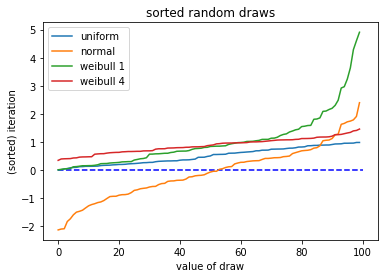

In [42]:
x = plt.plot(sorted(u_values), label='uniform')
x = plt.plot(sorted(n_values), label='normal')
x = plt.plot(sorted(w_values_1), label='weibull 1')
x = plt.plot(sorted(w_values_4), label='weibull 4')
plt.title('sorted random draws')
plt.xlabel('value of draw')
plt.ylabel('(sorted) iteration')
plt.hlines(0, 0, POINTS, color='b', linestyle='dashed')
plt.legend()

#### Other methods

name | value
:--- | :----
sum  | total of entries in the ndarray
mean | mean of entries in ndarray
std  | standard devisation of entries in the ndarray
cumsum | cumulative sum of entries in the ndarray
sort | sort the ndarray
argmax | the index of the maximum item in the ndarray
argmin | the index of the minimum item in the ndarray

Many of these can work over different axes. The axis refers to a specific dimension of an ndarray. For example, if *x.dim = (2,3,4)* then axis=0 refers to the first dimension (with 2 elements), axis=1 refers to the second (with 3 elements), and axis=2 refers to the third dimension (with 4 element). When the axis is specified, the given operation works on the elements along that dimension. When no axis is specified, the default is for the operation to work on the entire array.

Think of *axis=0* as working on rows, and *axis=1* as working on columns. (I find that thinking of "x axis" and "y axis" is misleading.

**NOTE:** statistical functions such as computing correlations and covariances are available. But we will learn an easier way to use them, with pandas.

In [43]:
seq_array = np.arange(6).reshape((3,2))
print(seq_array)

[[0 1]
 [2 3]
 [4 5]]


In [44]:
print(seq_array.sum())
print(seq_array.sum(axis=0))
print(seq_array.sum(axis=1))

15
[6 9]
[1 5 9]


In [33]:
seq_array = np.arange(24).reshape((2,3,4))

print(seq_array)

print(seq_array.sum())

#print(seq_array.sum(axis=0))
#print(seq_array.sum(axis=1))
print(seq_array.sum(axis=2))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
276
[[ 6 22 38]
 [54 70 86]]


In [34]:
print('Random array: {}\n'.format(rand_array))
print('means in total: {}'.format(rand_array.mean()))
print('std in total: {}\n'.format(rand_array.std()))
print('means moving across rows: {}'.format(rand_array.mean(axis=0)))
print('std moving across rows: {}\n'.format(rand_array.std(axis=0)))
print('means moving across columns: {}'.format(rand_array.mean(axis=1)))
print('std moving across columns: {}'.format(rand_array.std(axis=1)))

Random array: [[ 1.19498867 -0.38309088 -1.0390716  -0.20434023]
 [ 0.34405066 -0.12863235  0.97460834 -0.90161537]
 [-0.40167926 -0.35377191  0.80891513 -0.47139225]
 [ 0.75011726  0.83632439 -0.44373794 -0.02691897]]

means in total: 0.0346721062202
std in total: 0.670700804945

means moving across rows: [ 0.47186933 -0.00729269  0.07517848 -0.40106671]
std moving across rows: [ 0.58731342  0.49691177  0.84530631  0.32946262]

means moving across columns: [-0.10787851  0.07210282 -0.10448207  0.27894618]
std moving across columns: [ 0.81388423  0.68499883  0.52900594  0.53584011]


In [35]:
seq_array = np.arange(6).reshape((2,3))
print(seq_array); print()
print('cumulative over entire array\n{}\n'.format(seq_array.cumsum()))
print('cumulative over rows\n{}\n'.format(seq_array.cumsum(axis=0)))
print('cumulative over columns\n{}'.format(seq_array.cumsum(axis=1)))

[[0 1 2]
 [3 4 5]]
()
cumulative over entire array
[ 0  1  3  6 10 15]

cumulative over rows
[[0 1 2]
 [3 5 7]]

cumulative over columns
[[ 0  1  3]
 [ 3  7 12]]


In [40]:
rand_list = np.random.randn(10)
print('Random list:\n{}\n'.format(rand_list))
#print(rand_list.argmax())
#print(rand_list.argmin())

print('max in {}\n\tis at index {}\n\tvalue {}'.format(rand_list, 
                                                  rand_list.argmax(),
                                                  rand_list[rand_list.argmax()]
                                                 )                                                           
     )

Random list:
[-1.44868458  1.02474313  0.60198918 -0.06687054  0.45953063  0.4171702
 -0.43877519 -2.17640497  1.10788004 -1.44583842]

max in [-1.44868458  1.02474313  0.60198918 -0.06687054  0.45953063  0.4171702
 -0.43877519 -2.17640497  1.10788004 -1.44583842]
	is at index 8
	value 1.10788004332


## less silly example: microbiome data from a file

Compute average relative abundance of each taxa in a microbiome sample, and average relative abundance over all taxa in each sample.

In [49]:
import numpy as np

### The first attempt to read the file has an (instructive) problem

In [41]:
# pull off general data from file

file_name = 'microbiome_data.txt'
fh = open(file_name, 'r')
abundances = fh.read() # .split('\n')
x = [s.split('\t') for s in abundances.split('\n')]

taxa_headers = x[0][1:-3]
statistic_headers = x[0][-3:]
patient_ids = [s.pop(0) for s in x[1:]]

IOError: [Errno 2] No such file or directory: 'microbiome_data.txt'

In [42]:
# create the ndarray

array2d = [[np.float(digit) for digit in line[1:]] for line in x[1:]] #x[1:-1]]

data = np.array(array2d)

print(data[:3])

NameError: name 'x' is not defined

Why isn't this an ndarray? to find out, I tried using just chunks of data.

In [66]:
print('Original data (note, NOT type "array": \n{}\n'.format(array2d[:2]))
#print([array2d[-2:]])

data = np.array(array2d[:]) # change range to [:n]

print('first {0} and last {0} lines of data:\n {1}'.format(2,data[:2]))


Original data (note, NOT type "array": 
[[0.04614204651947973, 0.0013938563779167972, 0.0008314900243815879, 0.09939048274723454, 0.3235626455365195, 2.529852256628213e-05, 0.0018612471942309923, 0.013861359522638336, 7.309941520467836e-05, 0.018342041800590122, 23288.0, 1.2489698918808638, 2.764083921045238], [0.2841456786181501, 0.0018426771758656062, 0.03758653051563417, 4.464617328552749e-05, 0.0, 2.9488086812927577e-05, 0.0, 0.0, 0.0004452132882514228, 0.0006801643786268412, 40926.0, 0.7726215979153231, 1.8584348880097592]]

first 2 and last 2 lines of data:
 [ list([0.04614204651947973, 0.0013938563779167972, 0.0008314900243815879, 0.09939048274723454, 0.3235626455365195, 2.529852256628213e-05, 0.0018612471942309923, 0.013861359522638336, 7.309941520467836e-05, 0.018342041800590122, 23288.0, 1.2489698918808638, 2.764083921045238])
 list([0.2841456786181501, 0.0018426771758656062, 0.03758653051563417, 4.464617328552749e-05, 0.0, 2.9488086812927577e-05, 0.0, 0.0, 0.0004452132882514

### example do-over

In [67]:
# 0. get the data into a format we can use

file_name = 'microbiome_data.txt'
fh = open(file_name, 'r')
abundances = fh.read() # .split('\n')
data = [ l.split('\t') 
         for l in abundances.split('\n') 
         if l != ''  # <-- fixes problem
       ] 

taxa_headers = data[0][1:-3]     # get all taxa names, note how '-3' generalizes #/taxa
statistic_headers = data[0][-3:] # ditto statistics
patient_ids = [ l.pop(0).strip() for l in data[1:] ]

#print('taxa_headers: {}\n'.format(taxa_headers))
#print('statistic_headers: {}\n'.format(statistic_headers))
#print('patient_ids: {}\n'.format(patient_ids))


In [68]:
# 0. get the data into a format we can use

array2d = [ 
    [np.float(number) for number in line] 
    for line in data[1:]     # skip patient ID column
]

data_all = np.array(array2d)

print('data head: {}\n'.format(data[:2]))
#print('data tail: {}\n'.format(data[-2:]))

#print(list(zip(taxa_headers+statistic_headers, data[0])))

data head: [['patientID', 'Lactobacillus_crispatus', 'Lactobacillus_iners', 'Lactobacillus_gasseri', 'Lactobacillus_jensenii', 'Atopobium_vaginae', 'Megasphaera_sp._type_1', 'Streptococcus_anginosus', 'Prevotella_genogroup_3', 'Clostridiales', 'Enterococcus_faecalis', 'Corynebacterium_accolens', 'Total', 'Shannon', 'Simpson'], ['0.4945164323392374', '0.04614204651947973', '0.0013938563779167972', '0.0008314900243815879', '0.09939048274723454', '0.3235626455365195', '2.529852256628213e-05', '0.0018612471942309923', '0.013861359522638336', '7.309941520467836e-05', '0.018342041800590122', '23288', '1.2489698918808638', '2.764083921045238']]



In [69]:
# 0. get the data into a format we can use

sample_ids = [sample[0] for sample in data_all]

# note that these are slices, so changing any of them will also change data_all
data_totals = data_all[:,-3]
data_shannon = data_all[:,-2]
data_simpson = data_all[:,-1]
data_rel_abundances = data_all[:,:-3]

In [70]:
# 1. compute column averages

column_means = data_all.mean(axis=0)

#print_pairs = list(zip(taxa_headers+statistic_headers, column_means))
#print('Data item and statistic means: \n{}\n'.format('\n'.join([str(x) for x in print_pairs])))

In [71]:
# 1a. compute column standard deviations

column_stds = data_all.std(axis=0)

#print_pairs = list(zip(taxa_headers+statistic_headers, column_stds))
#print('sample relative abundance std: \n{}\n'.format(
#    '\n'.join([str(x) for x in print_pairs]) ) )

In [72]:
print_list = list(zip(taxa_headers+statistic_headers, 
                      column_means, 
                      column_stds))
print('item\tmean value\tstd')
for line in print_list:
    x,y,z = line
    print('{}\t{}\t{}'.format(x,y,z))


item	mean value	std
Lactobacillus_crispatus	0.43840475505916016	0.4055375357582975
Lactobacillus_iners	0.26441239340682926	0.2906688846766097
Lactobacillus_gasseri	0.08012853190493892	0.26700995020427243
Lactobacillus_jensenii	0.10882819179699561	0.269457378546012
Atopobium_vaginae	0.05831509930479773	0.15054797031570843
Megasphaera_sp._type_1	0.02266527510925744	0.06985271529883028
Streptococcus_anginosus	0.005182577528503548	0.01521655543208985
Prevotella_genogroup_3	0.010760423974206467	0.033583473967716077
Clostridiales	0.008195650556625321	0.03198618406615665
Enterococcus_faecalis	0.00010321410068544093	0.0002759924512645189
Corynebacterium_accolens	0.003003887258000032	0.00460022796336117
Total	43158.44	12940.85021342879
Shannon	0.5385390618206469	0.4165163547495702
Simpson	1.6183698340096688	0.689076011421449


In [73]:
list(zip([1,2,3],[4,5,6],[7,8,9]))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]

In [74]:
# 2. multiple the total number of reads by the relative abundance

#print('rel abundances: {}\n'.format(data_rel_abundances))
#print('totals: {}\n'.format(data_totals))

total_abundances = (data_rel_abundances.T * data_totals).astype(int)

print('total abundances: {}'.format(total_abundances))

total abundances: [[11516 27634  7561 31704    32    41 23478  7371 56725 40118     2   351
  45933    19    12     8 51258 47147 30965    34 62524    20    10 34110
  44083]
 [ 1074 11628  8516  3270 20557   178 23334 31689    21 18353 20856 18762
   6757     2     1    49  6616    37 12361 50437    50 24891  2809  3453
   3128]
 [   32    75    20   156    29 27488    46    13     0    21     8    33
    175    10     0 57572   474     0   352     6     0     0     0     0
      0]
 [   19  1538     1   760  4715    14   315     2     3  1497     2     0
     19 59938 28327     0  1156     8   183    21    44 22322     2   645
    603]
 [ 2314     1  3633     0    15     0     0     0     0    38 18490  3921
      2     0     0     0    10     0     0     0     0     2 14512     0
      6]
 [ 7535     0  4081     1     0     0     0     0     1     0     0   610
      0     0     0     0     0     0     0     0     0     0  1366     0
      2]
 [    0     1    12     0   781   533   

In [75]:
# 3. compute the row totals for the relative abundances (do they sum to 1?)

data_rel_abundances.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

##### Explore data

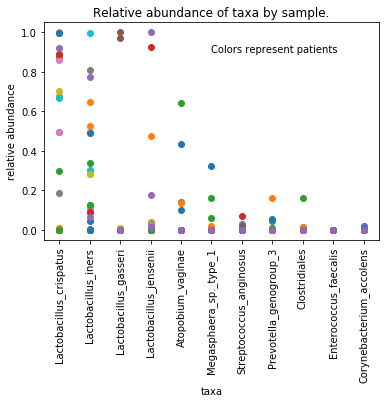

In [115]:
from matplotlib import pyplot as plt

for sample, sample_id in zip(data_rel_abundances, patient_ids):
    plt.plot(sample, 'o', label=sample_id)

plt.xlabel('taxa')
plt.ylabel('relative abundance')
plt.title('Relative abundance of taxa by sample')
plt.text(5,0.9,'Colors represent patients')
#plt.legend()
x = plt.xticks(range(len(taxa_headers)), 
               taxa_headers,
               rotation='vertical')

Looks like different patients may have different microbiomes (duh). Let's plot by patient.

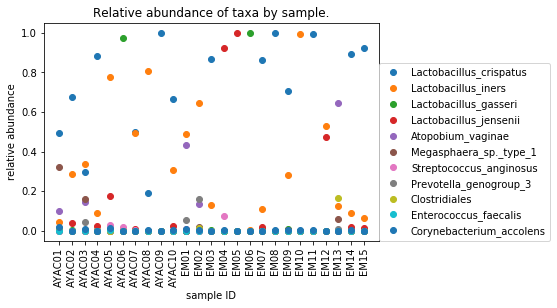

In [118]:
from matplotlib import pyplot as plt

for sample, taxon_id in zip(data_rel_abundances.T, taxa_headers):
    plt.plot(sample, 'o', label=taxon_id)

plt.xlabel('sample ID')
plt.ylabel('relative abundance')
plt.title('Relative abundance of taxa by sample.')
#plt.text(5,0.9,'Colors represent patients')
plt.legend(loc=(1,0))
x = plt.xticks(range(len(patient_ids)), 
               patient_ids,
               rotation='vertical')

hmmm...looks like some have a lot of *L. iners*, others have a lot if *L. crispatus*, and some may have little of either. Three classes of sample?

### Using random number generation

Suppose we want to create a simulation dataset (of *pseudo-replicates*) of relative abundances, similar to the above dataset but with every relative abundance skewed by a gaussian amount with a spread of $\sigma^2$

In [119]:
from numpy import random as rnd
SIM_SIZE = 10

# column_means, column_stds are mean and std of taxa in the actual samples

sim_data = []
for sample in range(SIM_SIZE):
    sim_samples = rnd.normal(column_means[:-3], column_stds[:-3]**2)
    sim_data.append(sim_samples)

print('means: \n{0}\n'.format(column_means))
print('stds: \n{0}\n'.format(column_stds))
print('{0} pseudoreplicates: \n{1}\n'.format(SIM_SIZE, sim_data))

means: 
[  4.38404755e-01   2.64412393e-01   8.01285319e-02   1.08828192e-01
   5.83150993e-02   2.26652751e-02   5.18257753e-03   1.07604240e-02
   8.19565056e-03   1.03214101e-04   3.00388726e-03   4.31584400e+04
   5.38539062e-01   1.61836983e+00]

stds: 
[  4.05537536e-01   2.90668885e-01   2.67009950e-01   2.69457379e-01
   1.50547970e-01   6.98527153e-02   1.52165554e-02   3.35834740e-02
   3.19861841e-02   2.75992451e-04   4.60022796e-03   1.29408502e+04
   4.16516355e-01   6.89076011e-01]

10 pseudoreplicates: 
[array([  4.34905925e-01,   3.21359714e-01,   6.92262867e-02,
         3.34224952e-03,   4.40250972e-02,   1.99445190e-02,
         5.12775209e-03,   1.16328297e-02,   8.15861922e-03,
         1.03277131e-04,   3.08568471e-03]), array([  5.35731432e-01,   2.88293639e-01,   7.62934517e-02,
         1.21729133e-01,   3.36711413e-02,   2.44991434e-02,
         5.52448519e-03,   1.04312771e-02,   7.81861646e-03,
         1.03261108e-04,   3.03360529e-03]), array([  5.7683699